In [ ]:
!pip install ace-tools

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score
from datetime import datetime
import re
from datetime import datetime, timedelta
import random
from IPython.display import display
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from datetime import timedelta

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataMining/modularisasi/data/raw/dunia-anak-ceria_tokopedia_full_data.csv')
df.head(10)

,Harga Produk,Jumlah Terjual,Jumlah Ulasan,Kategori,Nama Produk,Nama Toko,Rating,Rating Produk,Rating Toko,Tanggal Komentar,Teks Ulasan,Username
0,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,"sesuai deskripsi, bahan adem, ukiran pas bange...",A***a
1,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,"bagus tapi ya sesuai harga 45, berharap kaos s...",B***i
2,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,"Ukuran pas, bahan lumayan",R***r
3,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,Menurut saya ini sangat jelek bahan panas,B***m
4,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,Kualitas produk: Bagus,B***t
5,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,bagus dan pas bgt,H***c
6,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,Nyaman,M***l
7,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,Barang bagus,D***i
8,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,Barang ok,W***l
9,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,Sesuai harga☺,V***d


In [4]:
# 1. Ganti simbol "-" dengan NaN
df_processed = df.replace("-", pd.NA)

# 2. Drop kolom yang tidak dibutuhkan
df_processed = df_processed.drop(columns=["Nama Toko", "Rating Toko"], errors='ignore')

# 3. Bersihkan simbol pada Harga Produk & Jumlah Terjual
df_processed['Harga Produk'] = pd.to_numeric(
    df_processed['Harga Produk'].astype(str).str.replace(r'[^\d]', '', regex=True),
    errors='coerce'
)

df_processed['Jumlah Terjual'] = pd.to_numeric(
    df_processed['Jumlah Terjual'].astype(str).str.replace(r'[^\d]', '', regex=True),
    errors='coerce'
)

# 4. Konversi kolom numerik lainnya
df_processed['Jumlah Ulasan'] = pd.to_numeric(df_processed['Jumlah Ulasan'], errors='coerce')
df_processed['Rating'] = pd.to_numeric(df_processed['Rating'], errors='coerce')
df_processed['Rating Produk'] = pd.to_numeric(df_processed['Rating Produk'], errors='coerce')

# 5. Konversi tanggal komentar ke datetime
df_processed['Tanggal Komentar'] = pd.to_datetime(df_processed['Tanggal Komentar'], errors='coerce')

# 6. Isi tanggal kosong dengan tanggal acak dalam 1 tahun terakhir
mask_null_date = df_processed['Tanggal Komentar'].isnull()
num_missing_dates = mask_null_date.sum()
random_dates = [datetime.today() - timedelta(days=np.random.randint(0, 365)) for _ in range(num_missing_dates)]
df_processed.loc[mask_null_date, 'Tanggal Komentar'] = random_dates

# 7. Encode kategori jadi numerik
le_kategori = LabelEncoder()
df_processed['Kategori'] = le_kategori.fit_transform(df_processed['Kategori'].astype(str))

df_processed.head(10)


/tmp/ipython-input-4-680909791.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_processed['Tanggal Komentar'] = pd.to_datetime(df_processed['Tanggal Komentar'], errors='coerce')


,Harga Produk,Jumlah Terjual,Jumlah Ulasan,Kategori,Nama Produk,Rating,Rating Produk,Tanggal Komentar,Teks Ulasan,Username
0,51999.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-08-08 14:45:07.455669,"sesuai deskripsi, bahan adem, ukiran pas bange...",A***a
1,51999.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-09-10 14:45:07.455726,"bagus tapi ya sesuai harga 45, berharap kaos s...",B***i
2,51999.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-04-11 14:45:07.455735,"Ukuran pas, bahan lumayan",R***r
3,51999.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-05-22 14:45:07.455740,Menurut saya ini sangat jelek bahan panas,B***m
4,51999.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-11-17 14:45:07.455745,Kualitas produk: Bagus,B***t
5,51999.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-01-26 14:45:07.455750,bagus dan pas bgt,H***c
6,51999.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-01-30 14:45:07.455754,Nyaman,M***l
7,51999.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-03-19 14:45:07.455760,Barang bagus,D***i
8,51999.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-10-24 14:45:07.455766,Barang ok,W***l
9,51999.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-12-31 14:45:07.455771,Sesuai harga☺,V***d


In [5]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Harga Produk      574 non-null    float64       
 1   Jumlah Terjual    568 non-null    float64       
 2   Jumlah Ulasan     256 non-null    float64       
 3   Kategori          585 non-null    int64         
 4   Nama Produk       585 non-null    object        
 5   Rating            572 non-null    float64       
 6   Rating Produk     565 non-null    float64       
 7   Tanggal Komentar  585 non-null    datetime64[ns]
 8   Teks Ulasan       570 non-null    object        
 9   Username          572 non-null    object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 45.8+ KB


In [6]:
df_processed.describe()

,Harga Produk,Jumlah Terjual,Jumlah Ulasan,Kategori,Rating,Rating Produk,Tanggal Komentar
count,574.000000,568.000000,256.000000,585.000000,572.0,565.000000,585
mean,135799.451220,112.628521,25.265625,3.644444,5.0,4.816637,2025-01-27 21:06:39.764711424
min,51999.000000,2.000000,0.000000,0.000000,5.0,1.000000,2024-07-22 14:45:07.457633
25%,74000.000000,57.500000,7.000000,1.000000,5.0,4.800000,2024-11-03 14:45:07.457261056
50%,119999.000000,80.000000,16.000000,2.000000,5.0,4.900000,2025-02-02 14:45:07.457661952
75%,208000.000000,100.000000,23.000000,7.000000,5.0,4.900000,2025-04-18 14:45:07.456820992
max,269000.000000,750.000000,196.000000,12.000000,5.0,5.000000,2025-07-21 14:45:07.456591
std,68767.024723,122.324925,37.940404,3.258299,0.0,0.237539,NaN


In [7]:
# Copy ulang agar bersih
df_converted = df_processed.copy()

# Bersihkan simbol Rp dan titik dari Harga Produk
df_converted['Harga Produk'] = df_converted['Harga Produk'].astype(str)
df_converted['Harga Produk'] = df_converted['Harga Produk'].str.replace(r'[^\d]', '', regex=True)

# Ubah ke float lalu bagi 1000 (asumsi data awal misalnya 51000 = Rp 51.000)
df_converted['Harga Produk'] = pd.to_numeric(df_converted['Harga Produk'], errors='coerce') / 1000

# Lalu ubah ke format ribuan
df_converted['Harga Produk'] = df_converted['Harga Produk'].fillna(0).round().astype(int).apply(
    lambda x: f"{x * 100:,}".replace(",", ".")
)

df_converted.head(10)

,Harga Produk,Jumlah Terjual,Jumlah Ulasan,Kategori,Nama Produk,Rating,Rating Produk,Tanggal Komentar,Teks Ulasan,Username
0,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-08-08 14:45:07.455669,"sesuai deskripsi, bahan adem, ukiran pas bange...",A***a
1,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-09-10 14:45:07.455726,"bagus tapi ya sesuai harga 45, berharap kaos s...",B***i
2,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-04-11 14:45:07.455735,"Ukuran pas, bahan lumayan",R***r
3,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-05-22 14:45:07.455740,Menurut saya ini sangat jelek bahan panas,B***m
4,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-11-17 14:45:07.455745,Kualitas produk: Bagus,B***t
5,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-01-26 14:45:07.455750,bagus dan pas bgt,H***c
6,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-01-30 14:45:07.455754,Nyaman,M***l
7,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-03-19 14:45:07.455760,Barang bagus,D***i
8,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-10-24 14:45:07.455766,Barang ok,W***l
9,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-12-31 14:45:07.455771,Sesuai harga☺,V***d


In [8]:
df_converted['Teks Ulasan'] = df_converted['Teks Ulasan'].fillna("")

# Tambahkan fitur baru: panjang ulasan dalam karakter
df_converted['Panjang Ulasan (karakter)'] = df_converted['Teks Ulasan'].apply(len)

# Tambahkan fitur baru: panjang ulasan dalam jumlah kata
df_converted['Panjang Ulasan (kata)'] = df_converted['Teks Ulasan'].apply(lambda x: len(x.split()))

df_converted.head(10)

,Harga Produk,Jumlah Terjual,Jumlah Ulasan,Kategori,Nama Produk,Rating,Rating Produk,Tanggal Komentar,Teks Ulasan,Username,Panjang Ulasan (karakter),Panjang Ulasan (kata)
0,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-08-08 14:45:07.455669,"sesuai deskripsi, bahan adem, ukiran pas bange...",A***a,83,13
1,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-09-10 14:45:07.455726,"bagus tapi ya sesuai harga 45, berharap kaos s...",B***i,56,10
2,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-04-11 14:45:07.455735,"Ukuran pas, bahan lumayan",R***r,25,4
3,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-05-22 14:45:07.455740,Menurut saya ini sangat jelek bahan panas,B***m,41,7
4,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-11-17 14:45:07.455745,Kualitas produk: Bagus,B***t,22,3
5,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-01-26 14:45:07.455750,bagus dan pas bgt,H***c,17,4
6,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-01-30 14:45:07.455754,Nyaman,M***l,6,1
7,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-03-19 14:45:07.455760,Barang bagus,D***i,12,2
8,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-10-24 14:45:07.455766,Barang ok,W***l,9,2
9,52.000,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-12-31 14:45:07.455771,Sesuai harga☺,V***d,13,2


In [9]:
np.random.seed(42)  # untuk konsistensi hasil
missing_ulasan_idx = df_converted[df_converted['Jumlah Ulasan'].isna()].index
df_converted.loc[missing_ulasan_idx, 'Jumlah Ulasan'] = np.random.randint(1, 21, size=len(missing_ulasan_idx))

# 2. Hapus baris yang memiliki missing value di kolom lainnya
df_cleaned = df_converted.dropna()

# 3. Tampilkan konfirmasi
print("✅ Data setelah pembersihan:")
print(df_cleaned.isna().sum())
print(f"\nTotal baris tersisa: {len(df_cleaned)}")

✅ Data setelah pembersihan:
Harga Produk                 0
Jumlah Terjual               0
Jumlah Ulasan                0
Kategori                     0
Nama Produk                  0
Rating                       0
Rating Produk                0
Tanggal Komentar             0
Teks Ulasan                  0
Username                     0
Panjang Ulasan (karakter)    0
Panjang Ulasan (kata)        0
dtype: int64

Total baris tersisa: 562


In [10]:
df_cleaned.describe()

,Jumlah Terjual,Jumlah Ulasan,Kategori,Rating,Rating Produk,Tanggal Komentar,Panjang Ulasan (karakter),Panjang Ulasan (kata)
count,562.000000,562.000000,562.000000,562.0,562.000000,562,562.00000,562.000000
mean,113.750890,17.003559,3.453737,5.0,4.815658,2025-01-28 23:17:34.787959808,41.52669,6.763345
min,2.000000,0.000000,0.000000,5.0,1.000000,2024-07-22 14:45:07.457633,0.00000,0.000000
25%,60.000000,5.000000,1.000000,5.0,4.800000,2024-11-04 20:45:07.457115136,9.00000,2.000000
50%,80.000000,12.000000,1.000000,5.0,4.900000,2025-02-06 14:45:07.457295104,29.00000,4.500000
75%,100.000000,19.000000,7.000000,5.0,4.900000,2025-04-21 02:45:07.456898304,58.00000,10.000000
max,750.000000,196.000000,10.000000,5.0,5.000000,2025-07-21 14:45:07.456591,173.00000,35.000000
std,122.490097,27.039484,3.076360,0.0,0.237794,NaN,40.49225,6.626195


In [11]:
# Hitung jumlah data yang missing (NaN) di setiap kolom
missing_data_count = df_cleaned.isna().sum()

# Tampilkan jumlah data missing
missing_data_count

,0
Harga Produk,0
Jumlah Terjual,0
Jumlah Ulasan,0
Kategori,0
Nama Produk,0
Rating,0
Rating Produk,0
Tanggal Komentar,0
Teks Ulasan,0
Username,0


Contoh Tabel RFM:


,Username,Recency,Frequency,Monetary (Rupiah)
0,*****,299,5,Rp 1.113.940
1,.****,7,1,Rp 967.500
2,1****,194,1,Rp 187.200
3,1***6,35,1,Rp 8.120
4,:****,338,1,Rp 84.000


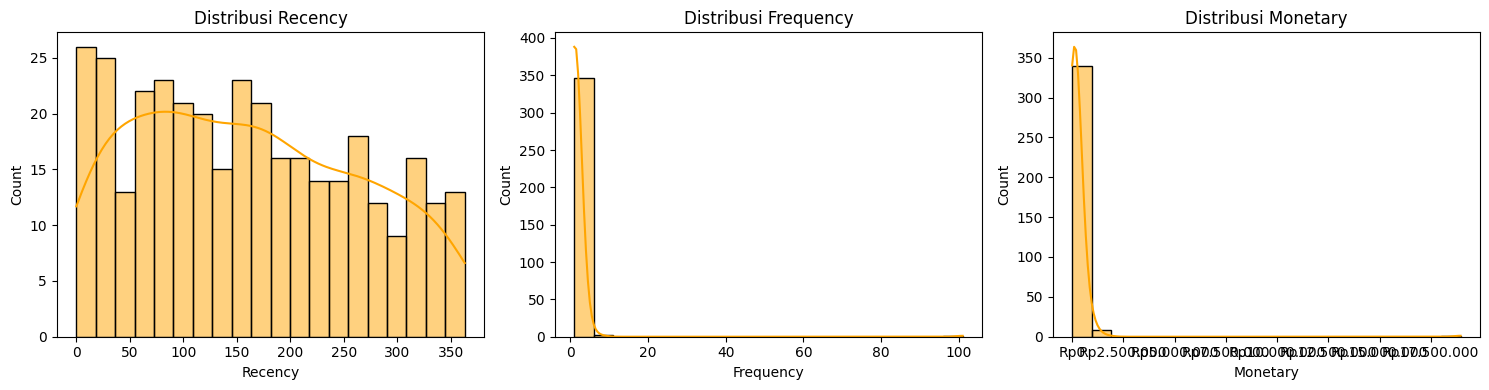

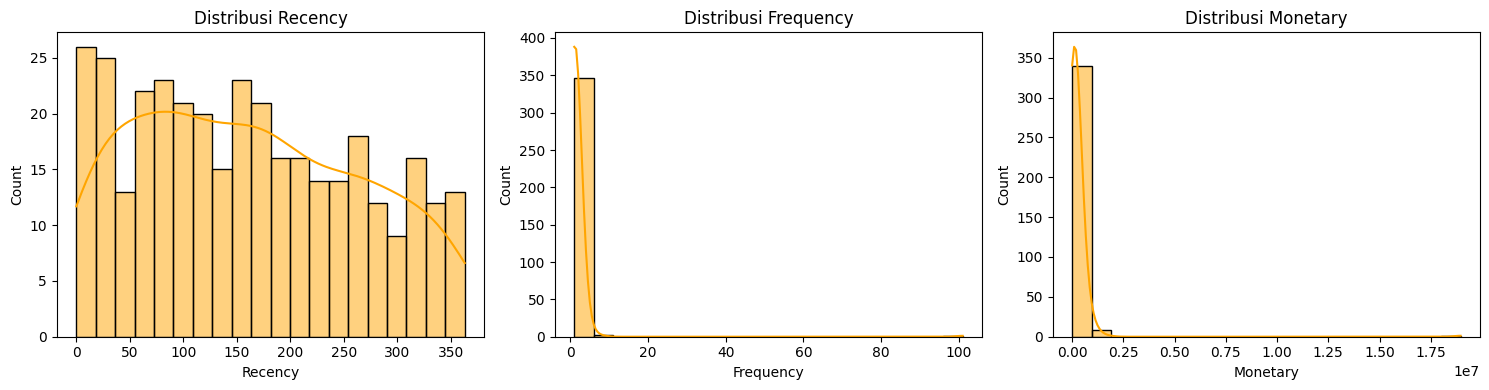

In [22]:
# Langkah 1: Import pustaka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# Langkah 4: Cek dan konversi data
df_cleaned['Harga Produk'] = pd.to_numeric(df_cleaned['Harga Produk'], errors='coerce')
df_cleaned['Jumlah Terjual'] = pd.to_numeric(df_cleaned['Jumlah Terjual'], errors='coerce')
df_cleaned['Tanggal Komentar'] = pd.to_datetime(df_cleaned['Tanggal Komentar'], errors='coerce')

# Langkah 5: Hitung estimasi nilai transaksi
df_cleaned['Nilai Transaksi'] = df_cleaned['Harga Produk'] * 10 * df_cleaned['Jumlah Terjual']

# Langkah 6: Snapshot date = tanggal terbaru di dataset
snapshot_date = df_cleaned['Tanggal Komentar'].max()

# Langkah 7: Hitung RFM
rfm = df_cleaned.groupby('Username').agg({
    'Tanggal Komentar': lambda x: (snapshot_date - x.max()).days,
    'Username': 'count',
    'Nilai Transaksi': 'sum'
}).rename(columns={
    'Tanggal Komentar': 'Recency',
    'Username': 'Frequency',
    'Nilai Transaksi': 'Monetary'
}).reset_index()

# Langkah 8: Tampilkan tabel RFM
print("Contoh Tabel RFM:")
# Format kolom Monetary ke Rupiah
rfm['Monetary (Rupiah)'] = rfm['Monetary'].apply(lambda x: f"Rp {x:,.0f}".replace(",", "."))
display(rfm[['Username', 'Recency', 'Frequency', 'Monetary (Rupiah)']].head())

# Plot dengan formatter
import matplotlib.ticker as mtick
plt.figure(figsize=(15, 4))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm[col].replace([np.inf, -np.inf], np.nan).dropna(), bins=20, kde=True, color='orange')
    plt.title(f'Distribusi {col}')
    if col == 'Monetary':
        plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'Rp{x:,.0f}'.replace(",", ".")))
plt.tight_layout()
plt.show()

rfm_csv_path = "/content/drive/MyDrive/DataMining/modularisasi/data/RFM per username/rfm_per_username.csv"
rfm.to_csv(rfm_csv_path, index=False)


# Langkah 9: Visualisasi distribusi
plt.figure(figsize=(15, 4))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm[col].replace([np.inf, -np.inf], np.nan).dropna(), bins=20, kde=True, color='orange')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


In [ ]:
csv_path = "/content/drive/MyDrive/DataMining/modularisasi/data/processed/cleaned_tokped_data.csv"
df_cleaned.to_csv(csv_path, index=False)